<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br><h1 style="list-style:none"> A2 - Unsupervised Analysis Project</h1><br>
<b>DAT-5303 | Machine Learning</b><br>
<b>Team 7</b><br>
Fabian Jaskotka<br>
Camilla Brossa<br>
Martin Sandberg<br>
Thu Do<br>
Pantawan Thongsri<br><br>
Hult International Business School<br><br>

<b>Windows oder Mac?</b><br>
   Analysis of personality traits and Hult DNA in regards to the decision making for computer manufacturer
</p>
    <ul>
        <li>Analyze Data</li>
        <li>Developing Top Insights</li>
        <li>External research to support findings</li>
    </ul>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br>

## Introduction

The aim of our analysis was to create a customer segmentation based on personality traits able to identify underlying patterns regarding laptop’s purchase behaviors. In other words, what are the common personality traits that characterize people who decide to purchase a Macbook instead of a Microsoft PC?

## Background Analysis
Before doing a technical analysis, we decided to run a background research including external material, in order to better understand the context.

According to Techwalla, a study conducted in April 2011 revealed that “Mac users were 22 percent more likely than PC users to be between the ages of 18 and 34” and “fifty-eight percent of Mac users identified themselves as "liberal," compared to 36 percent of PC users who said the same”. Furthermore, Mac users were “more likely than PC users to want to be "perceived as unique and different to make my own mark"” (Arvidson, n.d.). 
In 2006, Seth Stevenson wrote that the target audiences addressed by the two companies’ commercials were “cool” for Mac and “nerd” for Microsoft PCs (Stevenson, 2006). During the years, Apple kept this strategy for its campaigns, depicting PC users as “being arrogant, slow, boring, mean, unreasonable, and most importantly a nerd”, while Mac “displays a sense of caring, humility, and an overall cool and energetic vibe” (Sander, 2014).

Considering the Big Five personality types, this first introductory research gives the idea that Apple’s Mac target is mainly extrovert and open. 


## PCA 

We now analyze the results of the two Principal Components Analyses we ran on the given dataset based on the Five Personality Traits and the Hult DNA.
In order to create a simpler and more easily understandable model, we reduced the number of variables by grouping some of them together into clusters and by re-scaling others that were incorrectly quantified.

______________________________________________________________________________________________________________


# Loading Data

In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
########################################
# loading data and setting display options
########################################
# loading data
df = pd.read_excel('./datasets/survey_data.xlsx')

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


df.shape

(137, 79)

In [3]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

# Analysis for Hult DNA

## PCA

HULT DNA:
- 'See underlying patterns in complex situations', 
- 'Don't  generate ideas that are new and different', 
- 'Demonstrate an awareness of personal strengths and limitations', 
- 'Display a growth mindset', 
- 'Respond effectively to multiple priorities',
- 'Take initiative even when circumstances, objectives, or rules aren't clear', 
- 'Encourage direct and open discussions',
- 'Listen carefully to others', 
- 'Don't persuasively sell a vision or idea', 
- 'Build cooperative relationships', 
- 'Work well with people from diverse cultural backgrounds', 
- 'Effectively negotiate interests, resources, and roles', 
- 'Can't rally people on the team around a common goal',
- 'Translate ideas into plans that are organized and realistic', 
- 'Resolve conflicts constructively', 
- 'Seek and use feedback from teammates', 
- 'Coach teammates for performance and growth', 
- 'Drive for results'


In [4]:
df['Action']         = df["See underlying patterns in complex situations"] + \
                            df["Demonstrate an awareness of personal strengths and limitations"] +\
                            df["Display a growth mindset"] +\
                            df["Take initiative even when circumstances, objectives, or rules aren't clear"] + \
                            df["Don't persuasively sell a vision or idea"] + \
                            df["Coach teammates for performance and growth"] 
                           
df['People']         =  df["Listen carefully to others"] +\
                            df["Build cooperative relationships"] +\
                            df["Work well with people from diverse cultural backgrounds"]+ \
                            df["Effectively negotiate interests, resources, and roles"] +\
                            df["Resolve conflicts constructively"] +\
                            df['Seek and use feedback from teammates']
                           

df['System']         = df["Don't  generate ideas that are new and different"]+ \
                            df["Respond effectively to multiple priorities"] + \
                            df["Encourage direct and open discussions"] +\
                            df["Translate ideas into plans that are organized and realistic"] +\
                            df["Drive for results"] + \
                            df["Can't rally people on the team around a common goal"] 

In [5]:
df_3 = df[['Action', 'People', 'System']]

In [6]:
 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_3)


# TRANSFORMING our data after fit
X_scaled_2 = scaler.transform(df_3)


# converting scaled data into a DataFrame
df_scaled_2 = pd.DataFrame(X_scaled_2)


# reattaching column names
df_scaled_2.columns = df_3.columns

In [7]:
# INSTANTIATING a PCA object with no limit to principal components
pca_3 = PCA(n_components = 3, 
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca_3 = pca_3.fit_transform(df_3)

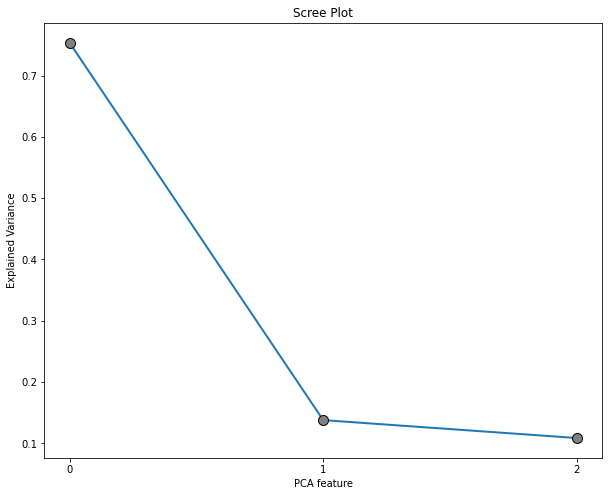

In [8]:
# calling the scree_plot function
scree_plot(pca_object = pca_3)

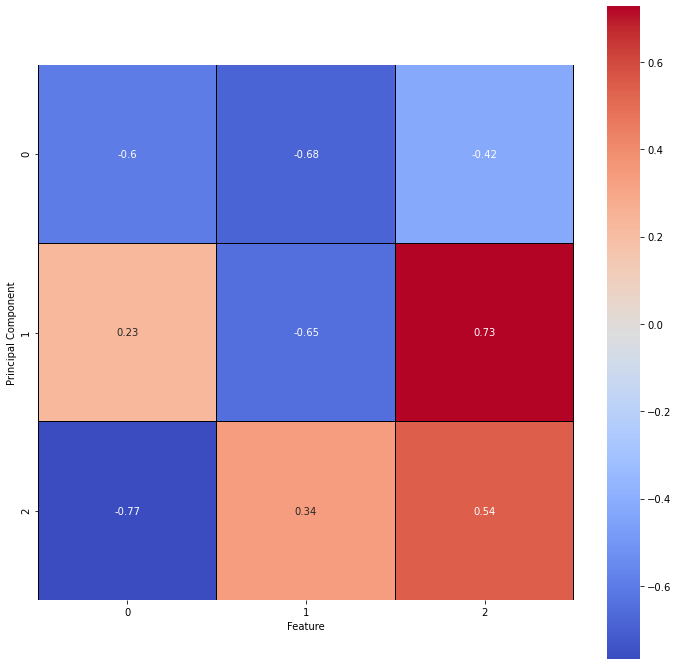

In [9]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca_3.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

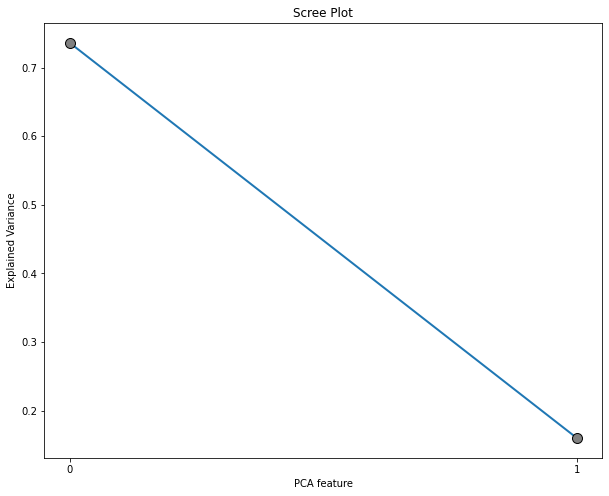

In [10]:
# INSTANTIATING a new model using 2 principal components
pca_4 = PCA(n_components = 2,
            random_state = 219)


# FITTING and TRANSFORMING the df_scaled
consumer_pca_4 = pca_4.fit_transform(df_scaled_2)


# calling the scree_plot function
scree_plot(pca_object = pca_4)

In [11]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(df_scaled_2.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_4 = pd.DataFrame(pd.np.transpose(pca_4.components_))


# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(df_scaled_2.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_4.round(2)}
""")


MAX Components Factor Loadings
------------------------------
           0     1     2
Action -0.60  0.23 -0.77
People -0.68 -0.65  0.34
System -0.42  0.73  0.54


2 Components Factor Loadings
------------------------------
           0     1
Action -0.60  0.27
People -0.58  0.50
System -0.55 -0.82



<ipython-input-11-10a47e54b992>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))
<ipython-input-11-10a47e54b992>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_4 = pd.DataFrame(pd.np.transpose(pca_4.components_))


## Cluster

In [12]:
# naming each principal component
factor_loadings_4.columns = ['Carefree',                 
                              'Thinking'] 


# checking the result
factor_loadings_4

,Carefree,Thinking
Action,-0.597115,0.268898
People,-0.583686,0.500613
System,-0.550240,-0.822849


In [13]:
# analyzing factor strengths per customer
X_pca_reduced_2 = pca_4.transform(df_scaled_2)


# converting to a DataFrame
X_pca_df_2 = pd.DataFrame(X_pca_reduced_2)


# renaming columns
X_pca_df_2.columns = factor_loadings_4.columns


# checking the results
X_pca_df_2

,Carefree,Thinking
0,0.261315,0.375651
1,0.007301,-0.800919
2,2.018631,-1.251417
3,-2.240845,-0.319784
4,1.665279,-0.104972
5,1.526269,0.565300
6,-1.071059,-1.150606
7,0.261315,0.375651
8,0.004663,-0.420084
9,-1.003640,0.186001


In [14]:
X_pca_df_2.to_excel('PCA Factor Loadings_2.xlsx',
                  index = False)

In [15]:
# checking variance amongst clusters
np.var(X_pca_df_2)

Carefree    2.208672
Thinking    0.480031
dtype: float64

In [16]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df_2)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df_2)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Carefree',                 
                      'Thinking'] 

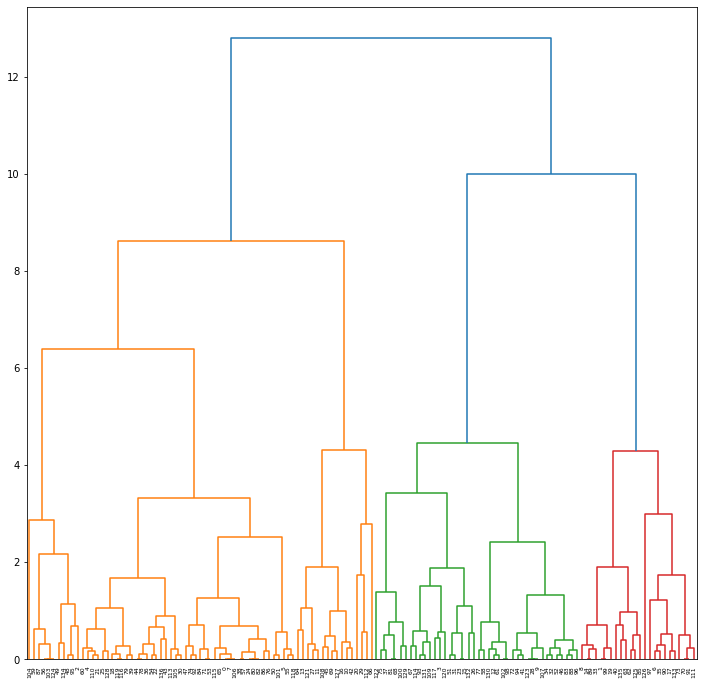

In [17]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.show()

In [18]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 3,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    54
2    51
1    32
Name: Cluster, dtype: int64


In [19]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Carefree',                 
                            'Thinking'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Carefree,Thinking
0,0.84,0.25
1,-0.12,-1.30
2,-0.82,0.55


In [20]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df_2],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([df.loc[ : , ['What laptop do you currently have?', 
                                             'What laptop would you buy in next assuming if all laptops cost the same?']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current_laptop',
                              'Next_laptop',
                              'Clusters',
                              'Carefree',
                              'Thinking']


# checking the results
print(final_pca_clust_df.head(n = 5))

   Current_laptop     Next_laptop  Clusters  Carefree  Thinking
0         Macbook         Macbook         0  0.261315  0.375651
1  Windows laptop  Windows laptop         1  0.007301 -0.800919
2  Windows laptop  Windows laptop         1  2.018631 -1.251417
3  Windows laptop  Windows laptop         2 -2.240845 -0.319784
4         Macbook  Windows laptop         0  1.665279 -0.104972


In [21]:
# renaming channels
current_names = {1 : 'Mac',
                 2 : 'Window',
                 3 : 'Chromebook'}


final_pca_clust_df['Current_laptop'].replace(current_names, inplace = True)



# renaming regions
next_names =   {1 : 'Mac',
                2 : 'Window',
                3 : 'Chromebook'}


final_pca_clust_df['Next_laptop'].replace(next_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Clusters'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df_2 = final_pca_clust_df


# checking results
data_df_2


,Current_laptop,Next_laptop,Clusters,Carefree,Thinking
0,Macbook,Macbook,Cluster 1,0.261315,0.375651
1,Windows laptop,Windows laptop,Cluster 2,0.007301,-0.800919
2,Windows laptop,Windows laptop,Cluster 2,2.018631,-1.251417
3,Windows laptop,Windows laptop,Cluster 3,-2.240845,-0.319784
4,Macbook,Windows laptop,Cluster 1,1.665279,-0.104972
5,Macbook,Macbook,Cluster 1,1.526269,0.565300
6,Windows laptop,Macbook,Cluster 2,-1.071059,-1.150606
7,Windows laptop,Windows laptop,Cluster 1,0.261315,0.375651
8,Macbook,Macbook,Cluster 2,0.004663,-0.420084
9,Windows laptop,Chromebook,Cluster 3,-1.003640,0.186001


## Visual Analysis

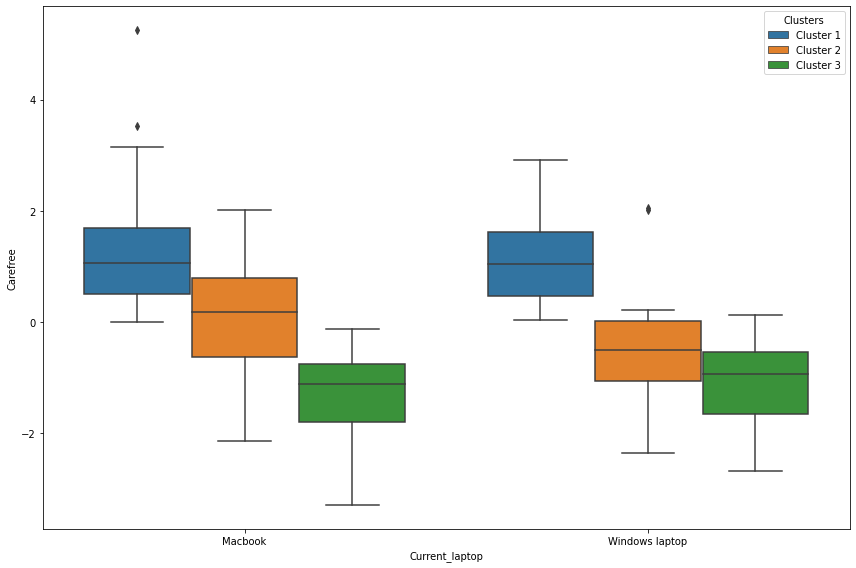

In [22]:
########################
# Current laptop
########################

#Carefree
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Carefree',
            hue = 'Clusters',
            data = data_df_2)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## Findings

The results of  Principal Components Analysis when we grouped the dataset based on the Hult DNA before running the Principal Components Analysis did not show much difference between each cluster group. Hult DNA does not explain the preference for Macbook or Windows well. It shall now be investigated, if the pre-grouped BigFive Categories give more insights into the behavior of Apple's clients.  

# Analysis for Big Five Categories (Grouped)

## PCA

1. Am the life of the party
2. Feel little concern for others
3. Am always prepared
4. Get stressed out easily 
5. Have a rich vocabulary
6. Don't talk a lot
7. Am interested in people
8. Leave my belongings around
9. Am relaxed most of the time
10. Have difficulty understanding abstract ideas
11. Feel comfortable around people
12. Insult people
13. Pay attention to details
14. Worry about things
15. Have a vivid imagination
16. Keep in the background
17. Sympathize with others' feelings
18. Make a mess of things
19. Seldom feel blue
20. Am not interested in abstract ideas
21. Start conversations
22. Am not interested in other people's problems
23. Get chores done right away
24. Am easily disturbed
25. Have excellent ideas
26. Have little to say
27. Have a soft heart
28. Often forget to put things back in their proper place
29. Get upset easily
30. Do not have a good imagination
31. Talk to a lot of different people at parties
32. Am not really interested in others
33. Like order
34. Change my mood a lot
35. Am quick to understand things
36. Don't like to draw attention to myself
37. Take time out for others
38. Shirk my duties
39. Have frequent mood swings
40. Use difficult words
41. Don't mind being the center of attention
42. Feel others' emotions
43. Follow a schedule
44. Get irritated easily
45. Spend time reflecting on things
46. Am quiet around strangers
47. Make people feel at ease
48. Am exacting in my work
49. Often feel blue
50. Am full of ideas

       
- FORMULA: 
1. E = 20 + (1) ___ - (6) ___ + (11) ___ - (16) ___ + (21) ___ - (26) ___ + (31) ___ - (36) ___ + (41) ___ - (46) ___ 

2. A = 14 - (2) ___ + (7) ___ - (12) ___ + (17) ___ - (22) ___ + (27) ___ - (32) ___ + (37) ___ + (42) ___ + (47) ___ 

3. C = 14 + (3) ___ - (8) ___ + (13) ___ - (18) ___ + (23) ___ - (28) ___ + (33) ___ - (38) ___ + (43) ___ + (48) ___ 

4. N = 38 - (4) ___ + (9) ___ - (14) ___ + (19) ___ - (24) ___ - (29) ___ - (34) ___ - (39) ___ - (44) ___ - (49) ___ 

5. O = 8 + (5) ___ - (10) ___ + (15) ___ - (20) ___ + (25) ___ - (30) ___ + (35) ___ + (40) ___ + (45) ___ + (50) ___ 

Reference
https://stars.library.ucf.edu/cgi/viewcontent.cgi?article=1270&context=honorstheses

In [23]:
df['Extrovert']         = 20 + df["Am the life of the party"] - df["Don't talk a lot"] + df["Feel comfortable around people"] - \
                            df["Keep in the background"] + df["Start conversations"] - df["Have little to say"] + \
                            df["Talk to a lot of different people at parties"] - df["Don't like to draw attention to myself"] + \
                            df["Don't mind being the center of attention"] -  df["Am quiet around strangers"]

df['Agreeableness']     = 14 - df["Feel little concern for others"] + df["Am interested in people"] - df["Insult people"] +\
                            df["Sympathize with others' feelings"]- df["Am not interested in other people's problems"] +\
                            df["Have a soft heart"] - df["Am not really interested in others"] + \
                            df["Take time out for others"] + df["Feel others' emotions"] + df["Make people feel at ease"] 


df['Conscientiousness'] = 14 + df["Am always prepared"]- df["Leave my belongings around"] + df["Pay attention to details"] -\
                            df["Make a mess of things"] + df["Get chores done right away"] - \
                            df["Often forget to put things back in their proper place"] + df["Like order"] - \
                            df["Shirk my duties"] + df["Follow a schedule"] + df["Am exacting in my work"] 

df['Neuroticism']       = 38 - df["Get stressed out easily"] + df["Am relaxed most of the time"] - df["Worry about things"] +\
                            df["Seldom feel blue"] - df["Am easily disturbed"] - df["Get upset easily"] - \
                            df["Change my mood a lot"] - df["Have frequent mood swings"]- \
                            df["Get irritated easily"]- df["Often feel blue"]


df['Openness']          = 8 + df["Have a rich vocabulary"]- df["Have difficulty understanding abstract ideas"] +\
                            df["Have a vivid imagination"] - df["Am not interested in abstract ideas"] + df['Have excellent ideas'] -\
                            df["Do not have a good imagination"] + df["Am quick to understand things"] + \
                            df["Use difficult words"] + df["Spend time reflecting on things"] + df["Am full of ideas"] 

In [24]:
df_2 = df[['Extrovert', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']]


In [25]:
 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_2)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(df_2)


# converting scaled data into a DataFrame
df_scaled = pd.DataFrame(X_scaled)


# reattaching column names
df_scaled.columns = df_2.columns


# checking pre- and post-scaling variance
print(pd.np.var(df_2), '\n\n')
print(pd.np.var(df_scaled))

Extrovert            43.033300
Agreeableness        31.442059
Conscientiousness    30.336619
Neuroticism          46.906282
Openness             27.372050
dtype: float64 


Extrovert            1.0
Agreeableness        1.0
Conscientiousness    1.0
Neuroticism          1.0
Openness             1.0
dtype: float64


<ipython-input-25-e39af3db6b62>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(df_2), '\n\n')
<ipython-input-25-e39af3db6b62>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(df_scaled))


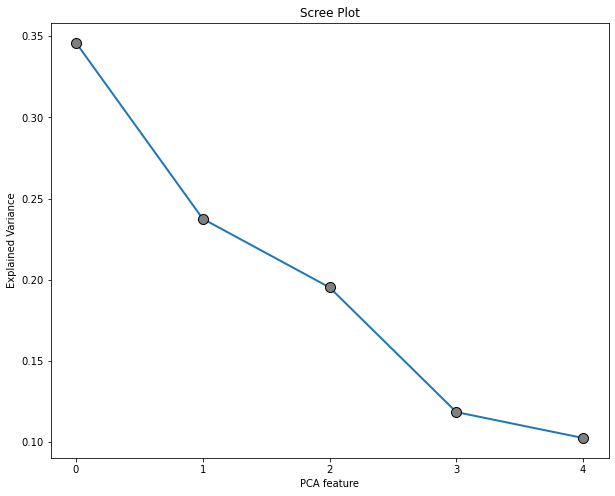

In [26]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None, 
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(df_2)

# calling the scree_plot function
scree_plot(pca_object = pca)

In [27]:
# component number counter
component_number = 0

# looping over each principal component
# explained variance similar to confusion matrix 
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.346
PC 2 : 0.238
PC 3 : 0.195
PC 4 : 0.119
PC 5 : 0.103


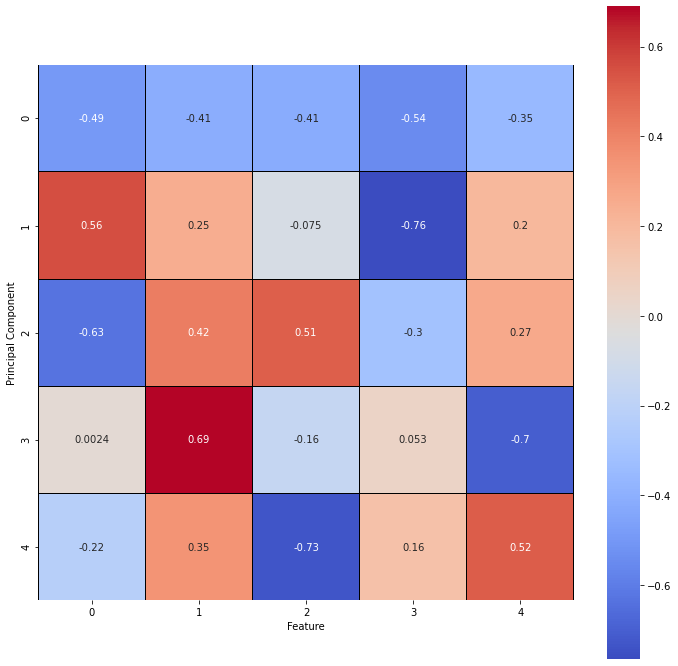

In [28]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

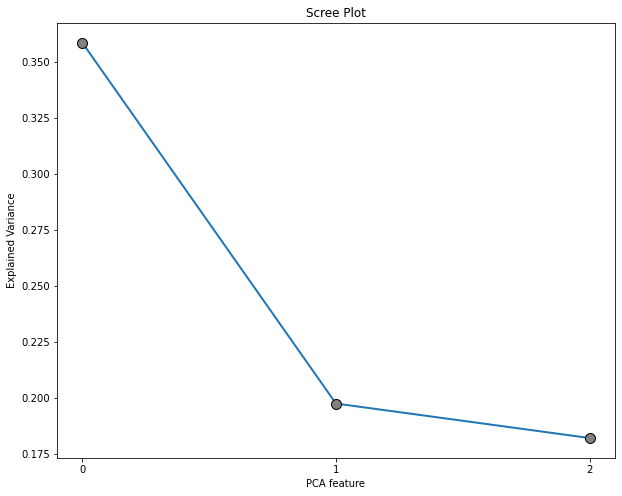

In [29]:
# INSTANTIATING a new model using 4 principal components
pca_2 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the df_scaled
consumer_pca_2 = pca_2.fit_transform(df_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_2)

In [30]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(df_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(df_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
Extrovert         -0.49  0.56 -0.63  0.00 -0.22
Agreeableness     -0.41  0.25  0.42  0.69  0.35
Conscientiousness -0.41 -0.07  0.51 -0.16 -0.73
Neuroticism       -0.54 -0.76 -0.30  0.05  0.16
Openness          -0.35  0.20  0.27 -0.70  0.52


3 Components Factor Loadings
------------------------------
                      0     1     2
Extrovert         -0.36  0.52 -0.68
Agreeableness     -0.51  0.19  0.27
Conscientiousness -0.52 -0.35  0.36
Neuroticism       -0.30 -0.72 -0.55
Openness          -0.50  0.23  0.17



<ipython-input-30-42e852741ae1>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-30-42e852741ae1>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


## Cluster

In [31]:
# naming each principal component
factor_loadings_2.columns = ['Calmness',                 
                              'Chiller',          
                              'Concientiousness'] 


# checking the result
factor_loadings_2

,Calmness,Chiller,Concientiousness
Extrovert,-0.356778,0.519424,-0.683433
Agreeableness,-0.512719,0.190331,0.269625
Conscientiousness,-0.517428,-0.352309,0.364181
Neuroticism,-0.302406,-0.718096,-0.547915
Openness,-0.500647,0.232789,0.165481


In [32]:
# analyzing factor strengths per customer
X_pca_reduced = pca_2.transform(df_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_2.columns


# checking the results
X_pca_df

,Calmness,Chiller,Concientiousness
0,-0.021091,-0.237649,0.122182
1,0.298578,-0.306639,0.843163
2,0.636433,-1.540068,-1.740577
3,0.157214,0.605706,0.420821
4,1.706482,0.517452,-0.370428
5,1.996393,1.119690,0.959050
6,1.214815,1.025901,0.661974
7,-1.312541,-0.324142,-1.268575
8,0.918573,-0.863280,0.110127
9,-1.676962,-0.506733,0.422601


In [33]:
X_pca_df.to_excel('PCA Factor Loadings.xlsx',
                  index = False)

In [34]:
# checking variance amongst clusters
np.var(X_pca_df)

Calmness            1.792832
Chiller             0.986934
Concientiousness    0.909896
dtype: float64

In [35]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Calmness',                 
                      'Chiller',          
                      'Concientiousness'] 

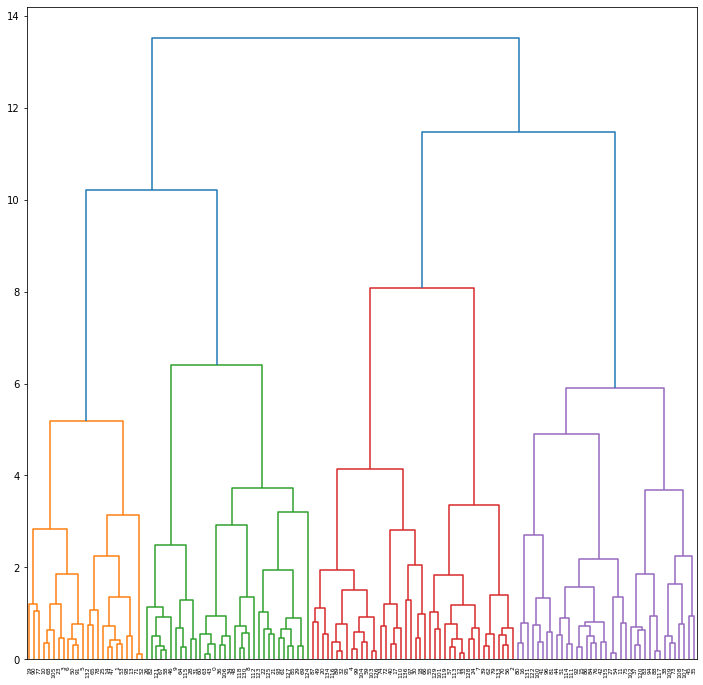

In [36]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.show()

In [37]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    34
0    29
3    26
2    26
4    22
Name: Cluster, dtype: int64


In [38]:

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Calmness',                 
                            'Chiller',        
                            'Conscientiousness']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)


,Calmness,Chiller,Conscientiousness
0,1.18,0.27,-0.50
1,-0.12,-0.91,0.79
2,-0.25,-0.64,-1.08
3,-1.18,0.69,-0.43
4,0.32,0.98,1.23


In [39]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([df.loc[ : , ['What laptop do you currently have?', 
                                             'What laptop would you buy in next assuming if all laptops cost the same?']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current_laptop',
                              'Next_laptop',
                              'Clusters',
                              'Calmness',
                              'Chiller',
                              'Conscientiousness']


# checking the results
print(final_pca_clust_df.head(n = 5))

   Current_laptop     Next_laptop  Clusters  Calmness   Chiller  Conscientiousness
0         Macbook         Macbook         1 -0.021091 -0.237649           0.122182
1  Windows laptop  Windows laptop         1  0.298578 -0.306639           0.843163
2  Windows laptop  Windows laptop         2  0.636433 -1.540068          -1.740577
3  Windows laptop  Windows laptop         4  0.157214  0.605706           0.420821
4         Macbook  Windows laptop         0  1.706482  0.517452          -0.370428


In [40]:
# renaming channels
current_names = {1 : 'Mac',
                 2 : 'Window',
                 3 : 'Chromebook'}


final_pca_clust_df['Current_laptop'].replace(current_names, inplace = True)



# renaming regions
next_names =   {1 : 'Mac',
                2 : 'Window',
                3 : 'Chromebook'}


final_pca_clust_df['Next_laptop'].replace(next_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Clusters'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


## Visual Analysis

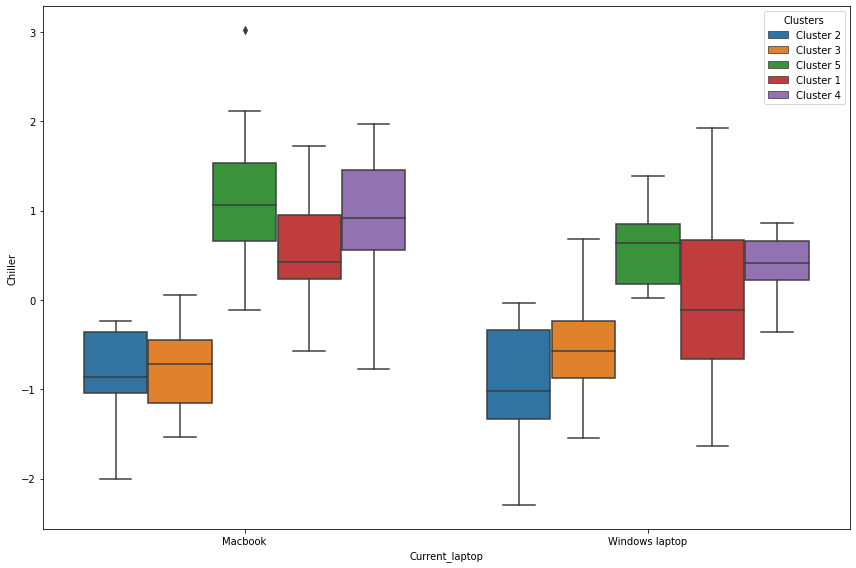

In [41]:
########################
# Current laptop
########################

#Calmness
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current_laptop',
            y = 'Chiller',
            hue = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## Findings

Distinct Big Five personality traits of clusters:
- Group 1: Low Agreeableness, low conscientiousness, low Openness, high extrovert, high neuroticism 
- Group 2: Introvert
- Group 3: High neuroticism
- Group 4: High agreeableness, high conscientiousness, high openness,  extrovert, low neuroticism 
- Group 5: Low neuroticism

Findings:
The results of  Principal Components Analysis when we grouped the dataset based on the Five Personality Traits before running the Principal Components Analysis did not show much difference between each cluster group. Therefore, the PCA shall now be conducted on all questions of the Big Five test and then grouped accordingly.

However, one thing that seems to be standing out is that Mac users in group 1,4, and 5 are more extroverted and emotionally stable than Windows users in said groups. 



# Analysis for Big Five Behaviors (Individually)

## Preparing Data

In [42]:
# loading data
apple = pd.read_excel('./datasets/survey_data.xlsx')

#renaming columns
apple.columns = ['surveyID', 'party_life', 'little_concern_for_others', 
                 'always_prepared', 'stressed_out_easily', 'rich_vocabulary', 
                 'Not_talking_much', 'interested_in_people', 'Leave_belongings_around', 
                 'relaxed', 'difficulty_understanding_abstract_ideas', 
                 'comfortable_around_people', 'Insult_people', 'attention_to_details',
                 'Worry', 'vivid_imagination', 'in_the_background', 'Sympathize', 
                 'Making_mess', 'Seldom_feel_blue', 'not_interested_in_abstract_ideas', 
                 'Start_conversations', 'not_interested_other_people_problems', 
                 'chores_done', 'easily_disturbed', 'excellent_ideas', 'little_to_say', 
                 'soft_heart', 'Forget_put_things_back', 'upset_easily', 
                 'no_good_imagination', 'Talk_different_people_parties', 
                 'no_interested_others', 'Like_order','Change_mood', 
                 'quick_understand', 'no_attention_myself', 'time_for_others', 
                 'Shirk_duties', 'frequent_mood_swings', 'difficult_words', 
                 'center_of_attention', 'Feel_other_emotions', 'Follow_schedule', 
                 'irritated_easily', 'reflecting', 'quiet_around_strangers', 
                 'Make_people_feel_ease', 'exacting_in_work', 'Often_feel_blue', 
                 'full_of_ideas', 'patterns_in_complex_situations', 
                 'No_ideas_new_and_different', 'self_awareness', 'growth_mindset', 
                 'effective_with_multiple_priorities', 'initiative', 
                 'direct_open_discussions', 'effective_to_multiple_priorities.1', 
                 'initiative.1', 'direct_open_discussions.1', 'Listen_carefully', 
                 'Not_sell_vision_or_idea', 'cooperative_relationships', 
                 'Work_with_people_cultures', 'Effectively_negotiate', 
                 'No_common_goal', 'ideas_into_plans', 'Resolve_conflicts', 
                 'Seek_feedback', 'Coach_teammates', 'Drive_for_results', 
                 'laptop_currently', 'laptop_would_buy', 'program', 'age', 
                 'Gender', 'nationality', 'ethnicity']

In [43]:
#inverting answers tothose questions that are asked the 'wrong' way around
invert = ['difficulty_understanding_abstract_ideas', 
          'not_interested_in_abstract_ideas', 'no_good_imagination', 
         'No_ideas_new_and_different', 'Making_mess', 'Forget_put_things_back',
         'Shirk_duties', 'Leave_belongings_around', 'Not_talking_much', 
         'in_the_background', 'little_to_say', 'no_attention_myself', 
         'quiet_around_strangers', 'little_concern_for_others','Insult_people',
         'not_interested_other_people_problems', 'no_interested_others',
         'relaxed','Seldom_feel_blue','Not_sell_vision_or_idea','No_common_goal']

#looping over columns to change
for item in invert:
    
    placeholder_lst = []
    
    #looping through column
    for value in apple[item]:
        
        
        if value == 1:
            placeholder_lst.append(5)
            
        elif value == 2:
            placeholder_lst.append(4)
            
        elif value == 3:
            placeholder_lst. append(3)
            
        elif value == 4:
            placeholder_lst.append(2)
            
        elif value == 5:
            placeholder_lst.append(1)
            
        else:
            print("Something went wrong")
            
        #creating new column in dataset
        apple['INV_'+ item] = pd.Series(placeholder_lst)
            

### Dropping dirty observations

Based on the comparison between the following features and the inverse of the opposite questions, the data points are being removed:
- Imagination
- Attention
- Interest in others
- Relaxed
- Feeling Blue

In [44]:
#dropping obvservations of people that did not pay attention
apple = apple.drop([66, 69, 91,120,122,126,135], axis = 0)

### Grouping of variables

In [45]:
#BigFive Questions
big_five  = ['rich_vocabulary', 'vivid_imagination', 'excellent_ideas', 
           'reflecting', 'full_of_ideas', 'quick_understand', 
           'difficult_words', 'INV_difficulty_understanding_abstract_ideas',
           'INV_not_interested_in_abstract_ideas','INV_no_good_imagination',
           'INV_No_ideas_new_and_different', 'always_prepared', 
               'attention_to_details', 'chores_done', 'Like_order', 
               'Follow_schedule', 'exacting_in_work', 'INV_Making_mess',
               'INV_Forget_put_things_back','INV_Shirk_duties',
               'INV_Leave_belongings_around', 'party_life', 
               'comfortable_around_people', 'Start_conversations', 
               'Talk_different_people_parties', 'center_of_attention', 
               'INV_Not_talking_much','INV_in_the_background',
               'INV_little_to_say','INV_no_attention_myself',
               'INV_quiet_around_strangers', 'interested_in_people', 
               'Sympathize', 'soft_heart', 'time_for_others', 
               'Feel_other_emotions','Make_people_feel_ease', 
               'INV_little_concern_for_others','INV_Insult_people',
               'INV_not_interested_other_people_problems',
               'INV_no_interested_others', 'stressed_out_easily', 'Worry', 
               'easily_disturbed','upset_easily', 'Change_mood', 
               'frequent_mood_swings', 'irritated_easily', 'Often_feel_blue', 
               'INV_relaxed','INV_Seldom_feel_blue']

## PCA

In [46]:
# creating new data frame for PCA
apple_groups = apple.loc[: , big_five]


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(apple_groups)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(apple_groups)


# converting scaled data into a DataFrame
apple_scaled = pd.DataFrame(x_scaled)


# reattaching column names
apple_scaled.columns = apple_groups.columns

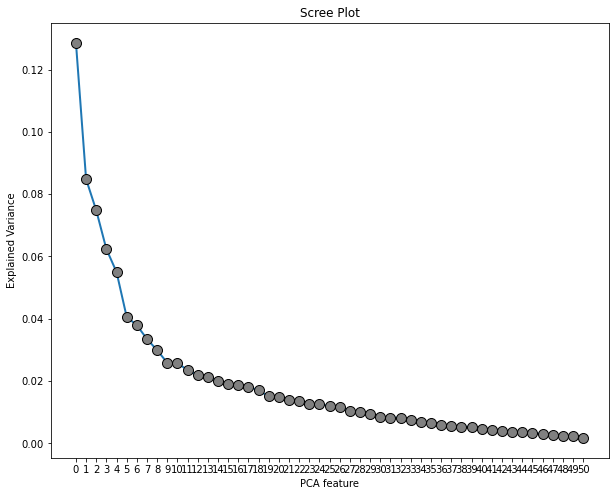

In [47]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(apple_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

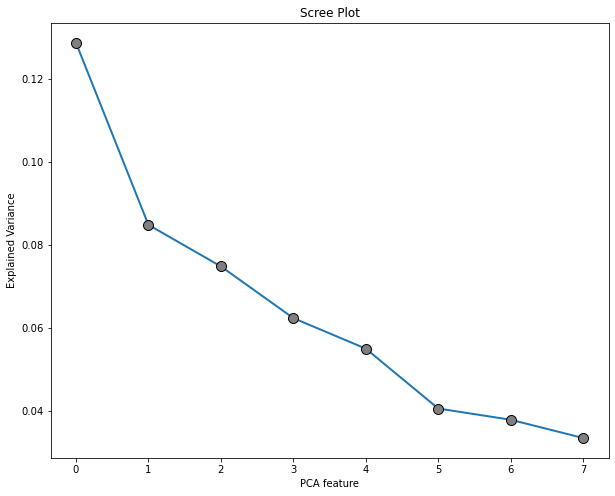

In [48]:
# INSTANTIATING a new model using the first three principal components
pca_8 = PCA(n_components = 8,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_8 = pca_8.fit_transform(apple_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_8)

In [49]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.129
PC 2 : 0.085
PC 3 : 0.075
PC 4 : 0.062
PC 5 : 0.055
PC 6 : 0.041
PC 7 : 0.038
PC 8 : 0.034
PC 9 : 0.03
PC 10 : 0.026
PC 11 : 0.026
PC 12 : 0.024
PC 13 : 0.022
PC 14 : 0.021
PC 15 : 0.02
PC 16 : 0.019
PC 17 : 0.019
PC 18 : 0.018
PC 19 : 0.017
PC 20 : 0.015
PC 21 : 0.015
PC 22 : 0.014
PC 23 : 0.014
PC 24 : 0.013
PC 25 : 0.013
PC 26 : 0.012
PC 27 : 0.012
PC 28 : 0.01
PC 29 : 0.01
PC 30 : 0.009
PC 31 : 0.009
PC 32 : 0.008
PC 33 : 0.008
PC 34 : 0.008
PC 35 : 0.007
PC 36 : 0.007
PC 37 : 0.006
PC 38 : 0.005
PC 39 : 0.005
PC 40 : 0.005
PC 41 : 0.005
PC 42 : 0.004
PC 43 : 0.004
PC 44 : 0.004
PC 45 : 0.004
PC 46 : 0.003
PC 47 : 0.003
PC 48 : 0.003
PC 49 : 0.002
PC 50 : 0.002
PC 51 : 0.002


In [50]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

0.9999999999999998


In [51]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(apple_scaled.columns)


# checking the result
# please see Excel file "Customer_factor_loadings_BigFive.xlsx" attatched


# saving to Excel
#factor_loadings_df.to_excel('customer_factor_loadings_4.xlsx')

<ipython-input-51-3312ee034221>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


In [52]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(apple_scaled.columns)


##################
### 8 PC Model ###
##################
# transposing pca components (pc = 8)
factor_loadings_8 = pd.DataFrame(pd.np.transpose(pca_8.components_))


# naming rows as original features
factor_loadings_8 = factor_loadings_8.set_index(apple_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


8 Components Factor Loadings
------------------------------
{factor_loadings_8.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                               0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50
rich_vocabulary                             -0.17  0.03  0.03  0.16  0.05 -0.15  0.15  0.33  0.25 -0.07  0.08  0.23 -0.09 -0.08 -0.07  0.07 -0.00 -0.05  0.05 -0.12  0.04  0.06 -0.03  0.22 -0.20  0.14  0.25 -0.18 -0.06 -0.07 -0.03 -0.20 -0.01 -0.17  0.06  0.03 -0.21 -0.01  0.00  0.10 -0.06 -0.24  0.23  0.28  0.10 -0.25  0.09  0.02  0.02  0.00 -0.02
vivid_imagination                           -0.07  0.21  0.11  0.14  0.18 -0.03 -0.11 -0.19  0.08  0.07 -0.03  0.00 -0.19  0.08  0.21  0.16 -0.09 -0.06  0.20  0.22 -0.08  0.22  0.17  0.24  0.15  0.12  0.13 -0.07 -0.10  0.01 -0.36  0.12 -

<ipython-input-52-0033d76b7ebb>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-52-0033d76b7ebb>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_8 = pd.DataFrame(pd.np.transpose(pca_8.components_))


In [53]:
# analyzing factor strengths per customer
X_pca_reduced = pca_8.transform(apple_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_8.columns


In [54]:
#renaming columns
# naming each principal component
factor_loadings_8.columns = ['Spoiled', 'Puberty', 'Wallflower', 'Lab_Scientist',
                             'Chiller', 'Leader', 'Influencer', 'Highly_Educated'] 

# checking the result
factor_loadings_8

,Spoiled,Puberty,Wallflower,Lab_Scientist,Chiller,Leader,Influencer,Highly_Educated
rich_vocabulary,-0.170666,0.026908,0.031196,0.156837,0.054390,-0.147632,0.145165,0.327361
vivid_imagination,-0.073218,0.206062,0.108669,0.135481,0.180542,-0.027551,-0.111737,-0.191428
excellent_ideas,-0.171469,0.099370,0.021031,0.217501,0.210328,0.144706,-0.131640,-0.048107
reflecting,-0.174475,0.077285,0.175970,-0.019385,0.096686,-0.207630,-0.118008,0.070347
full_of_ideas,-0.117373,0.125661,0.027394,0.200867,0.257721,0.107283,-0.134064,-0.111919
quick_understand,-0.148376,-0.010003,0.078610,0.201756,0.099078,-0.167492,0.189305,0.101928
difficult_words,-0.060736,0.032903,-0.030907,0.189324,0.105653,0.023536,0.080504,0.449980
INV_difficulty_understanding_abstract_ideas,-0.115026,-0.115624,-0.005235,0.272703,0.139836,-0.060685,-0.064039,0.114498
INV_not_interested_in_abstract_ideas,-0.197276,0.047668,0.036240,0.101053,0.163602,-0.116180,-0.235545,-0.027864
INV_no_good_imagination,-0.147674,0.112378,0.068204,0.229456,0.009582,-0.100852,-0.143590,-0.237678


## Clustering

In [55]:
# checking variance amongst clusters
np.var(X_pca_df)

0    6.560150
1    4.325631
2    3.815811
3    3.181108
4    2.806379
5    2.071813
6    1.934147
7    1.709860
dtype: float64

### Re-scalling

In [56]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Spoiled', 'Puberty', 'Wallflower', 'Lab_Scientist',
                        'Chiller', 'Leader', 'Influencer', 'Highly_Educated']

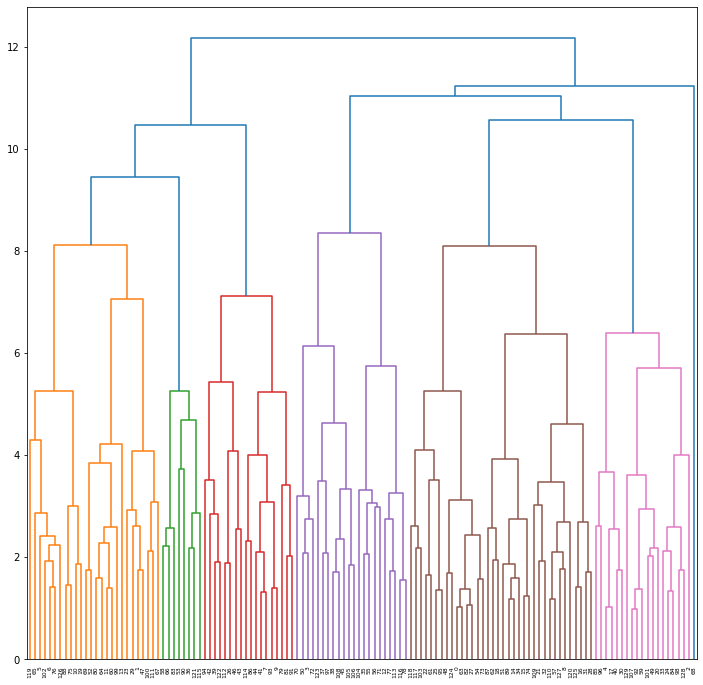

In [57]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

### Interia Plot

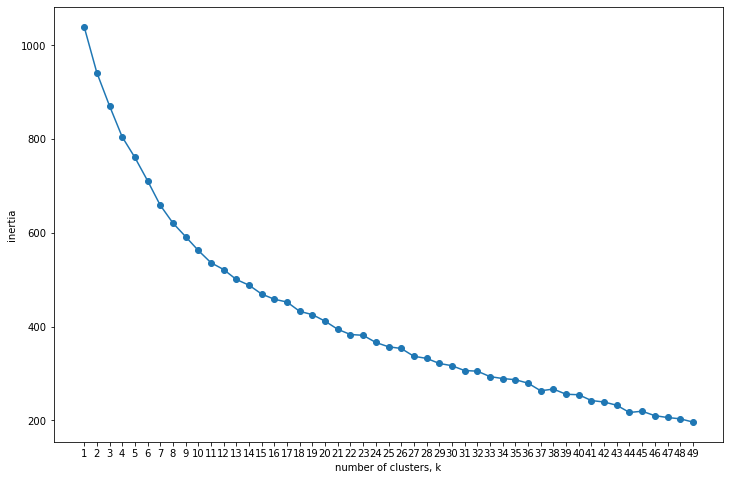

In [58]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

### K-Means

In [59]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

2    33
0    33
4    27
1    23
3    14
Name: Cluster, dtype: int64


In [60]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Spoiled', 'Puberty', 'Wallflower', 'Lab_Scientist',
                             'Chiller', 'Leader', 'Influencer', 'Highly_Educated'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Spoiled,Puberty,Wallflower,Lab_Scientist,Chiller,Leader,Influencer,Highly_Educated
0,-1.04,0.01,-0.64,0.30,0.14,-0.02,0.34,-0.39
1,0.57,-0.22,0.15,-0.34,0.27,0.52,-0.89,-0.85
2,-0.20,-0.28,0.57,-0.61,-0.52,0.18,0.40,0.43
3,0.10,-0.81,0.46,0.68,1.01,-0.98,-0.52,0.86
4,0.98,0.93,-0.29,0.31,-0.29,-0.13,0.12,0.23


### Joining with Demographic data

In [61]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([apple.loc[ : , ['laptop_currently', 
                                                'laptop_would_buy',
                                                'program','age','Gender',
                                                'nationality','ethnicity']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['laptop_currently', 'laptop_would_buy',
                              'program','age','Gender','nationality',
                              'ethnicity', 'Cluster', 'Spoiled', 'Puberty', 'Wallflower', 'Lab_Scientist',
                             'Chiller', 'Leader', 'Influencer', 'Highly_Educated'] 

In [62]:
# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,laptop_currently,laptop_would_buy,program,age,Gender,nationality,ethnicity,Cluster,Spoiled,Puberty,Wallflower,Lab_Scientist,Chiller,Leader,Influencer,Highly_Educated
0,Macbook,Macbook,DD (MIB & Business Analytics),25.0,Female,ecuador,Hispanic / Latino,Cluster 3,0.168372,-0.170873,0.435727,0.315569,-1.483493,0.839823,0.822149,1.029096
1,Windows laptop,Windows laptop,One year Business Analytics,27.0,Male,Ecuador,Hispanic / Latino,Cluster 2,0.575727,-0.123039,1.979770,1.366662,1.855647,0.467339,-0.290392,-1.593404
2,Windows laptop,Windows laptop,One year Business Analytics,25.0,Male,Indian,West Asian / Indian,Cluster 1,1.338814,-3.525629,-3.571795,3.206486,-0.656397,0.553582,3.123225,-1.289352
3,Windows laptop,Windows laptop,One year Business Analytics,26.0,Female,indian,West Asian / Indian,Cluster 2,0.401644,2.835710,0.804425,-1.587042,2.770868,0.279079,0.226736,-1.840889
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27.0,Male,China,Far east Asian,Cluster 5,3.665069,1.771221,-1.281320,0.136736,0.063594,0.925542,1.809450,1.195465
5,Macbook,Macbook,DD (MIB & Business Analytics),22.0,Male,Indian,West Asian / Indian,Cluster 5,4.014083,1.833292,1.646519,-0.924225,-0.943784,-1.866047,-0.808935,0.721851
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23.0,Female,Dominican,Hispanic / Latino,Cluster 5,2.587852,1.552862,0.764046,0.446236,-0.552267,-0.020010,-0.634092,-0.482233
7,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25.0,Female,Swiss,White / Caucasian,Cluster 1,-3.081817,-1.342591,-1.863474,-0.025898,-0.853956,-0.718228,0.140597,0.294669
8,Macbook,Macbook,DD (MBA & Business Analytics),38.0,Male,Japan,Far east Asian,Cluster 3,1.973234,-1.786485,0.189986,-0.218503,-0.843914,0.018252,0.091274,-0.303334
9,Windows laptop,Chromebook,DD (MBA & Business Analytics),31.0,Male,Costarrican,Hispanic / Latino,Cluster 1,-3.344168,-1.231496,0.600091,2.166521,-1.623843,1.455982,-0.383384,-0.215035


### Visual Analysis with Demographics

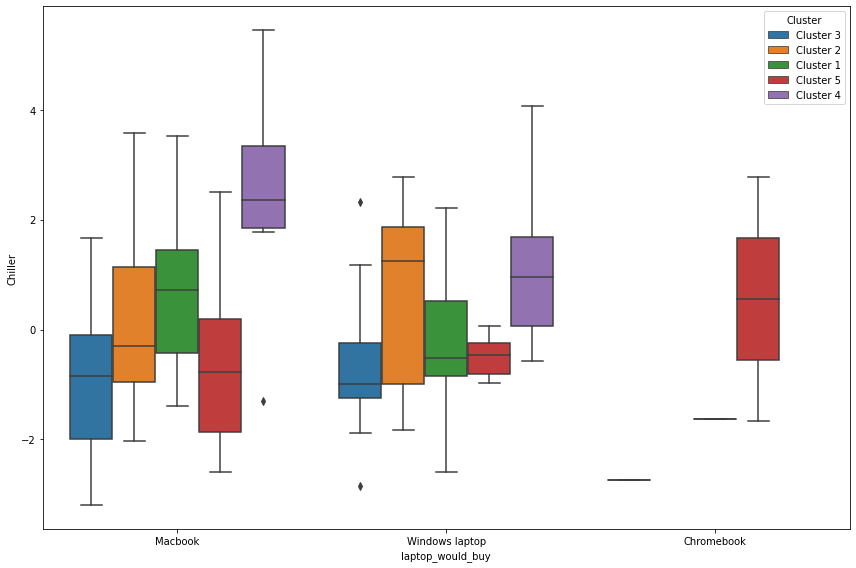

In [63]:
########################
# Laptop would buy
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'laptop_would_buy',
            y = 'Chiller',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## Findings

<b>Groups</b>

Group 1: Spoiled Kids \
These people are generally not curious, moody, irresponsible, they do not take duties seriously and get easily distracted. They are relatively young, mostly students, and rely on their parents financially. 

Group 2: Puberty (Teenagers) \
These people are often stressed and upset, easily irritable, mostly disorganized. They are probably non-working students in their teenage years. They enjoy drinking frappuccinos or milkshakes when they go out with friends, which is also their main hobby.

Group 3: Nerdy Wallflowers \
Generally quiet people, who don’t like interacting with strangers and don’t like parties or social gatherings. They enjoy spending time alone, they are very organized and detail-oriented. They like clean spaces and worry easily.

Group 4: Lab Scientists \
These people have many ideas but often not a big imagination. They do not sympathize with other people and are not comfortable in social gatherings. Mainly introverted and fact-oriented, they irritate easily and probably do not have many hobbies outside of their work.

Group 5: Netflix & Chill \
Mainly messy people, full of ideas, who are good listeners and make people feel at ease. They generally do not like being in the spotlight and they enjoy watching Netflix.

Group 6: Workaholic Businesspeople \
These people meticulously follows schedules as they they need a strict routine to get everything done. They probably get up very early to fit a workout in their busy mornings and then read the news while having a healthy breakfast. They enjoy being at the center of attention.

Group 7: Influencers \
These people are generally not abstract, they tend to insult people, and change mood easily. They like going out and are the life of the party. They like (and buy) everything that can make them look good and improves their status. 

Group 8: Highly Educated \
These people are usually very busy and don’t make time for others. They have an extensive vocabulary, enjoy learning new things, going to museums and are interested in anything that can teach them unique things. They can be disorganized and forget things.  


<b>Findings</b>
- The puberty group from cluster 1 prefers Macbook to Windows.
- The lab scientists from cluster 4 are more likely to purchase a Windows than a Mac for their next computer.
- The nerdy wallflowers from cluster 5 are more likely to purchase a Mac than a Windows for their next computer.
- The people in Cluster 4, exhibits high behavior of the Chiller kind. Moreover, those with especially high scores tend to want to buy a Macbook, as illustrated in the boxplot diagram above.
- The Influencers are more likely to purchase a Windows than a Mac for their next computer.
- The Highly Educated group are more likely to purchase a Mac than a Windows for their next computer.





# Report

Recommendations for Apple based on our findings:

Except for the ones in cluster 1, the puberty group prefers Windows. In order to change their mind based on their personality traits, Apple should focus more on the RAM and processor performance as these people can get angry or upset easily when the system runs slowly, especially when they are doing heavy-duty tasks like graphics design or playing a game. Moreover, size of laptop should be taken into consideration as it can be uncomfortable when carrying it to school.

Most of the lab scientist groups already prefer to buy Macbook. To switch the preference of the remaining groups based on their personality traits, Apple might focus more on improving RAM and multi-core processor performance so these people are better able to perform complex tasks with less waiting time.

In order to increase profit for Apple, people in Cluster 4 that want to buy a Macbook can be advertised with Netflix advertisement and potentially free months on the platform when settling on their preference to buy a Macbook.

In order to win over more customers from the Influeners group based on their personality traits, Apple should focus on the aesthetics of the Macbook for their campaigns, including its size and weight as it should be portable enough for them to take it out.

To encourage more people in the Higly Educated group to buy Macbook, Apple should focus on improving RAM and processor performance in order for this group to complete complex tasks on their Macbook. Moreover, Apple might also consider improving battery capacity as this group spend most of their time working on a laptop.


# References

Arvidson, E. (n.d.). Target Audience for Mac or Apple Computers. Retrieved January 31, 2021, from https://www.techwalla.com/articles/target-audience-for-mac-or-apple-computers

Sander, J. (2014, July 23). Mac vs. PC Campaign Analysis, Penn State Web Blog, Retrieved January 31, 2021, from https://sites.psu.edu/jordanleap/2014/07/23/mac-vs-pc-campaign-analysis/

Stevenson, S. (2006, June 19). Apple's mean-spirited ad campaign. Retrieved January 31, 2021, from https://slate.com/business/2006/06/apple-s-mean-spirited-ad-campaign.html